In [2]:
import pickle
import pandas as pd
import json
import seaborn as sns
df = pd.read_csv('../data/alkon-hinnasto-tekstitiedostona.csv')
beerdf = df[df['Tyyppi'] == 'oluet']
labeled = beerdf.sort_values('Alkoholi-%')

In [3]:
def classify(row):
    i = 2.8
    ii = 3.7
    iii = 4.7
    iva = 5.8

    if row['Alkoholi-%'] > iva:
        return 'IVB'
    if row['Alkoholi-%'] > iii:
        return 'IVA'
    if row['Alkoholi-%'] > ii:
        return 'III'
    if row['Alkoholi-%'] > i:
        return 'II'
    if row['Alkoholi-%'] >= 0:
        return 'I'
    else:
        return 'Error'

labeled['taxclass'] = labeled.apply(lambda row: classify(row), axis = 1)
labeled.head()

,Numero,Nimi,Valmistaja,Pullokoko,Hinta,Litrahinta,Uutuus,Hinnastojärjestyskoodi,Tyyppi,Alatyyppi,...,Alkoholi-%,Hapot g/l,Sokeri g/l,Kantavierrep-%,Väri EBC,Katkerot EBU,Energia kcal/100 ml,Valikoima,EAN,taxclass
6437,735484,The Original Small Beer Dark Lager,Small Beer Brew,"0,35 l",4.22,11.77,NaN,600,oluet,Tumma lager,...,1.0,NaN,NaN,1.0,NaN,20.0,NaN,tilausvalikoima,5060552040010,I
7128,743404,Mustan Virran St. Olaf Pale Ale 1.2%,Mustan Virran Panimo,"0,33 l",2.68,7.82,NaN,600,oluet,NaN,...,1.2,NaN,NaN,3.4,NaN,30.0,10.0,vakiovalikoima,6430062340686,I
6755,707486,Aecht Schlenkerla Rauchbier Hansla,Heller-Bräu Trum,"0,5 l",3.09,5.98,NaN,600,oluet,Erikoisuus,...,1.2,NaN,NaN,3.4,NaN,27.0,10.0,erikoiserä,4037458000180,I
6438,921525,The Original Small Beer Lager,Small Beer Brew Co.,"0,35 l",4.39,12.26,NaN,600,oluet,Lager,...,2.1,NaN,NaN,7.1,NaN,19.0,30.0,tilausvalikoima,5060552040003,I
7286,950736,Rohozec Pomelo Citrus Maxima,Pivovar Rohozec,"0,5 l",3.29,6.38,NaN,600,oluet,Erikoisuus,...,2.2,NaN,NaN,8.5,NaN,16.0,30.0,tilausvalikoima,8594011530721,I


In [4]:
#Cluster data by taxclasses
tc = labeled.groupby(['taxclass']).agg(products = ('Numero', 'count'),
    avg_price = ('Hinta', 'mean'),
    PPL = ('Litrahinta', 'mean'),
    avg_ABV = ('Alkoholi-%', 'mean')
).sort_values(by='taxclass')
tc

,products,avg_price,PPL,avg_ABV
taxclass,,,,
I,11,3.357273,8.738182,2.100000
II,7,3.907143,11.225714,3.514286
III,74,6.803649,8.620541,4.408108
IVA,317,5.635016,10.617981,5.268454
IVB,747,8.218768,18.637082,8.152209


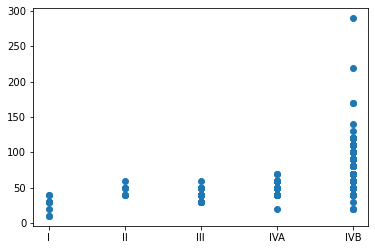

In [5]:
import matplotlib.pyplot as plt

plt.scatter(labeled['taxclass'], labeled['Energia kcal/100 ml'])
plt.show()

In [13]:
df_brewery = labeled.groupby(['Valmistaja', 'taxclass']).agg(
    products = ('Numero', 'count'),
    avg_price = ('Hinta', 'mean'),
    ppl = ('Litrahinta', 'mean'),
    avg_ABV = ('Alkoholi-%', 'mean')
).sort_values(by='Valmistaja')
display(df_brewery.head(10))
display(df_brewery.tail(10))

products  avg_price        ppl  \
Valmistaja                        taxclass                                   
8 Wired Brewing                   IVA              1       8.88  20.180000   
                                  IVB              1       9.97  22.660000   
A. Le Coq                         III              1       1.98   5.700000   
                                  IVA              1       2.99   5.780000   
                                  IVB              3       3.45   7.266667   
ABK                               IVA              5       4.20   8.200000   
                                  IVB              1       3.85   7.700000   
Abbaye du Val-Dieu                IVB              2       5.02  14.910000   
Abbey de Notre-Dame de Saint-Remy IVB              2       7.06  21.090000   
Abbeye d’Aulne                    II               1       3.49  10.270000   

                                              avg_ABV  
Valmistaja                        taxclass             
8 Wired Brewing                   IVA        5.500000  
                                  IVB       10.000000  
A. Le Coq                         III        4.500000  
                                  IVA        5.200000  
                                  IVB        6.833333  
ABK                               IVA        5.220000  
                                  IVB        6.000000  
Abbaye du Val-Dieu                IVB        9.750000  
Abbey de Notre-Dame de Saint-Remy IVB        9.700000  
Abbeye d’Aulne                    II         3.500000

products  avg_price    ppl  avg_ABV
Valmistaja      taxclass                                     
Wychwood        IVA              1       4.88   9.56      5.3
Young's         IVA              1       4.48   8.76      5.2
Zatecky Pivovar III              1       4.01   7.82      4.5
Zatecky pivovar IVA              1       4.24   8.28      5.7
Zoller-Hof      IVB              1       3.19   9.36      8.0
                IVA              1       4.50   8.80      5.5
Õllenaut        IVA              1       4.03  11.91      5.3
                IVB              1       3.98  11.76      7.9
                III              1       3.51  10.33      3.9
Žatecky pivovar IVA              1       3.67   7.14      5.3

In [40]:
df_by_beer = labeled.groupby(['Valmistaja', 'Alatyyppi', 'taxclass', 'Nimi', 'Pullokoko']).agg(
    price = ('Hinta', 'mean'),
    ppl = ('Litrahinta', 'mean'),
    ABV = ('Alkoholi-%', 'mean'),
).sort_values(by='Valmistaja')
display(df_by_beer.sample(30))


,,,,,price,ppl,ABV
Valmistaja,Alatyyppi,taxclass,Nimi,Pullokoko,,,
Stadin Panimo,Lager,IVA,Stadin American Lager,"0,33 l",3.56,10.48,5.3
Koskipanimo,Stout & Porter,IVB,Plevna Siperia Imperial Stout,"0,33 l",5.98,18.12,8.0
Laitilan Wirvoitusjuomatehdas,Vahva lager,IVB,Laitilan Kukko Tuima tölkki,"0,33 l",2.76,7.91,8.5
Tired Uncle Brewing Co.,Stout & Porter,IVB,Tired Uncle Metric Uncle Imperial Stout tölkki,"0,33 l",6.81,20.64,8.3
Ten Hands,Erikoisuus,IVB,Ten Hands Wilderness tölkki,"0,33 l",7.37,22.33,6.0
Brouwerij Alvinne NV,Erikoisuus,IVB,Alvinne Wild West Kriek-Framboos,"0,33 l",7.84,23.76,6.0
A. Le Coq,Lager,IVA,A. Le Coq Alexander,"0,5 l",2.99,5.78,5.2
Kopparbergs Bryggeri,Lager,IVA,Fagerhult Export,"0,5 l",4.23,8.26,5.3
Far Yeast Brewing Company,Erikoisuus,IVA,Far Yeast Tokyo White,"0,33 l",5.07,15.06,5.0
